by 
#### Bernardo Vimpi

May 2020

### PREDICTIVE SPORTS ANALYTICS: THE ENGLISH SOCCER PREMIER LEAGUE

In this project we analyze the the Soccer League in the United Kingdom: The Premier League. The Premier League (PL) is one, if not the most popular football(soccer) league in the world. It also hosts some of the top teams and soccer players in the world. I am also a big soccer fanatic and I take the "Blues" (Chealsea) on my sholders in rain, sunny days or snowy days. Yes, I get excited when I talk about soccer. But lets get focused here on this project: The goal here is to predict which team in the English Premier League is expected to win the title by the end of the 2019-2020 season. The league is comprised of 20 teams and only 1 is expected to win the title while the teams that end up at the bottom (with the lowest scores) at the end of the season, face higher probabilities of being relegated to a lower league. 

We use the dataset for the English Premier League season 2019-2020. Due to the covid-19 world pandemic, the league has been suspended. Thus we use the current data to display the current results and how teams are ranked and we use the different features (variables) to run predictions based on specific feature selection. At the end of each prediction we display the results and make final remarks. 

#### IMPORT LIBRARIES

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### DATA IMPORT & DATA EXPLORATION

In [27]:
g_data=pd.read_csv('epl2020.csv')
g_data

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,572,a,0.445922,2.028830,0.445922,2.028830,3,9,0,4,...,10,1,2,0,1.80,3.90,4.20,0.647059,0.333333,Sun
572,573,a,0.585469,1.738900,0.585469,1.738900,2,3,0,2,...,9,11,4,0,5.00,4.33,1.60,0.500000,0.285714,Sun
573,574,h,1.738900,0.585469,1.738900,0.585469,3,2,2,0,...,9,11,4,0,5.00,4.33,1.60,0.500000,0.285714,Sun
574,575,a,0.672448,2.412390,0.672448,1.651220,2,8,0,4,...,12,0,1,0,1.36,5.25,8.00,0.466667,0.250000,Mon


In [28]:
g_data.head(30)

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat
5,6,a,0.855516,0.670022,0.855516,0.670022,5,7,3,0,...,11,2,1,0,1.90,3.40,4.00,0.272727,0.600000,Sat
6,7,h,0.909241,1.087520,0.909241,1.087520,0,9,3,0,...,12,7,0,0,2.62,3.20,2.75,0.400000,0.272727,Sat
7,8,h,0.871590,1.224600,0.871590,1.224600,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
8,9,a,1.224600,0.871590,1.224600,0.871590,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
9,10,a,1.598640,1.340990,1.598640,1.340990,6,4,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat


### CURRENT STANDING

Due to the pandemic of covid-19, th English Premier League, has halted all of its games, temporarely. To eveluate which postions the teams are placed,using this dataset, we explore the wins, losses, draws, scored goals as well as the goals that were conceded. We also explore the games, points and goal difference for calculations and where do teams stands in the league. 

In [29]:
g_data.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

In [30]:
# lets get a list of all teams 
teams= g_data['teamId'].unique()

#lets set Positions as an array so the code doesn't fail

Positions = np.array(range(1,21))

# lets extract the results for each team in the Premier League and get the data for each team
team_results =[]
for team in teams:
    team_data = g_data[g_data['teamId']== team]
    
    
    wins = team_data ['wins'].sum()
    draws = team_data['draws'].sum()
    losses = team_data['loses'].sum()
    conceded = team_data['missed'].sum()
    scored = team_data['scored'].sum()
    games = wins + draws + losses
    points = (3 * wins) + draws
    goal_difference = scored - conceded
    
    team_results.append([team, games, wins, draws, losses, scored, conceded, goal_difference, points])
    
league_table = pd.DataFrame(team_results, columns =['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
league_table.sort_values(by=['Points', 'GD', 'F'], ascending = False, inplace=True, ignore_index=True)
league_table.set_index(Positions, inplace=True)
league_table.head(20)


,Team,P,W,D,L,F,A,GD,Points
1,Liverpool,29,27,1,1,66,21,45,82
2,Man City,28,18,3,7,68,31,37,57
3,Leicester,29,16,5,8,58,28,30,53
4,Chelsea,29,14,6,9,51,39,12,48
5,Man Utd,29,12,9,8,44,30,14,45
6,Wolves,29,10,13,6,41,34,7,43
7,Sheffield United,28,11,10,7,30,25,5,43
8,Tottenham,29,11,8,10,47,40,7,41
9,Arsenal,28,9,13,6,40,36,4,40
10,Burnley,29,11,6,12,34,40,-6,39


### EXPECTED GOALS: How would the expected goals influence team's positions? 

The number of expected goals and goal conceded toa into account how many goals each team is expected to score based on their past performances. Thus, we can incorporate the two values in a different table. By comparing the scored goals and the goals conceded in each game, give us the ability to calculate the expected goals and results and, based on those results, we can calculate them as before. 

However, to accomplish this task, we first need to extract the results of the won games based on the expected gaols. One issue we may face here is how the expected goals will be displayed. Due to the calculations, we anticipate that the expected goals will be decimal numbers. Since in real life there is no such as thing as "4.1", "3.3" or "2.5" goals scored per game, we'll round the expected goals to the nearest whole number. 

In [31]:
# lets calcualte the expected goals scores and conceded
g_data['xGround'] = g_data['xG'].apply(lambda x: round(x))
g_data['xGAround'] = g_data['xGA'].apply(lambda x: round(x))
g_data['xwin'] = g_data.apply(lambda x: 1 if x['xGround'] > x ['xGAround'] else 0, axis =1)
g_data['xdraw'] = g_data.apply(lambda x: 1 if x['xGround'] == x['xGAround'] else 0, axis =1)
g_data['xloss'] =g_data.apply(lambda x: 1 if x['xGround'] < x['xGAround'] else 0, axis =1)

###### RESULTS FOR EACH TEAM

In [32]:
x_team_results= []
for team in teams:
    team_data =g_data[g_data['teamId'] == team]
    
    wins = team_data['xwin'].sum()
    draws = team_data['xdraw'].sum()
    losses = team_data['xloss'].sum()
    scored = team_data['xGround'].sum()
    conceded = team_data['xGAround'].sum()
    games = wins + draws + losses
    points = (3 * wins) + draws
    goal_difference =scored - conceded
    
    x_team_results.append([team, games, wins, draws, losses, scored, conceded, goal_difference, points])
    
x_league_table = pd.DataFrame(x_team_results, columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
x_league_table.sort_values(by=['Points', 'GD', 'F'], ascending=False, inplace=True, ignore_index=True)
x_league_table.set_index(Positions, inplace=True)
x_league_table.head(20)

,Team,P,W,D,L,F,A,GD,Points
1,Man City,28,21,6,1,72,27,45,69
2,Liverpool,29,20,8,1,61,28,33,68
3,Chelsea,29,17,8,4,54,30,24,59
4,Wolves,29,14,11,4,44,31,13,53
5,Man Utd,29,14,8,7,49,32,17,50
6,Leicester,29,13,9,7,47,38,9,48
7,Everton,29,11,10,8,44,38,6,43
8,Burnley,29,10,13,6,40,39,1,43
9,Southampton,29,11,9,9,42,46,-4,42
10,Sheffield United,28,10,10,8,39,37,2,40


Unlike the previous results, here we see that if teams' performance is based on a single factor, expected goals, Man City would pass Liverpool by juts a point, Chealsea would take the 3rd place bringing Leicester down from previous 3rd place to now place while the Wolves would move up from 6th place to 4th place.  

### EXPETED POINTS: How would the expected points influence team's positions? 

Just like the expected goal, the expected points are also assigned to each team. We can use the results of the expected points to rank how the teams in the English Premier League.

In [33]:
exp_team_results =[]
for team in teams:
    team_data =g_data[g_data['teamId'] == team]
    exp = team_data['xpts'].sum()
    exp_team_results.append([team,exp])
    
exp_league_table =pd.DataFrame(exp_team_results, columns=['Team', 'Points'])
exp_league_table.sort_values(by=['Points'], ascending=False, inplace=True, ignore_index=True)
exp_league_table.set_index(Positions, inplace=True)
exp_league_table.head(20)

,Team,Points
1,Man City,63.2076
2,Liverpool,59.8127
3,Chelsea,55.5476
4,Man Utd,52.1008
5,Wolves,49.2557
6,Leicester,47.6633
7,Everton,46.6459
8,Southampton,41.0947
9,Burnley,39.5687
10,Sheffield United,39.0611


Using the expected points variable, Man City is expected to be the Champions and Liverpool trails behind in 2nd place.

### TEAM PERFORMANCE: How would the team performance influence team's positions?

Below we compare the current standing along with the expected standing. It is intresting to notice that both the expected goals table and the expecte points table provide similar rankins for the majority of the teams in the Premier League. We could compare either and for this project lets us the expected goals table. 


We can classify teams into two categories: "Overperforming" and "Not Overperforming". Here, by overperforming is categorized based on the fact if the team's current position is higher than the expected position. 

For example teams in the "Not Overperforming" categories are: Man City, Chelsea, Nan Utd, Wolves, Burnley, Everton, Southampton, Brighton, Watford, Bournemouth, Aston Villa, Norwich.

Teams in the 'Overperforming" categories are: Liverpool, Leicester, Sheffield United, Tottenham, Arsenal, Crystal Palace, Newcastle United and West Ham.

In [34]:
team_positions= []
for team in teams:
    current_pos = league_table[league_table['Team'] == team].index[0]
    xg_pos = x_league_table[x_league_table['Team'] == team].index[0]
    exp_pos = exp_league_table[exp_league_table['Team'] == team].index[0]
    overperforming = 'Yes' if current_pos < xg_pos else 'No'
    team_positions.append([team, current_pos, xg_pos, exp_pos, overperforming])
    
position_table = pd.DataFrame(team_positions, columns= ['Team', 'Position', 'xG Position', 'xPts Position', 'Overperforming'])
position_table.sort_values(by=['Position'], ascending=True, inplace=True,ignore_index=True)
position_table.head(20)
    

,Team,Position,xG Position,xPts Position,Overperforming
0,Liverpool,1,2,2,Yes
1,Man City,2,1,1,No
2,Leicester,3,6,6,Yes
3,Chelsea,4,3,3,No
4,Man Utd,5,5,4,No
5,Wolves,6,4,5,No
6,Sheffield United,7,10,10,Yes
7,Tottenham,8,13,12,Yes
8,Arsenal,9,11,14,Yes
9,Burnley,10,8,9,No


If we take performance as the main feature, Liverpool goes back on top to take the lead by virtually 1 point above Man City.

### RECENT PERFORMANCE: How would the recent performance influence team's positions?

Since the English Premier League is currently on halt due to Covid-19, when we make reference to the current performance we are mentioning the most recent games place prior to the Covid-19 Pandemic. The data can show us the extent to which teams were performing throught an analysis of their points. Due to the scope of this project, we look the points only of the most recent 6 games, meaning the last 6 games prior to the league suspending all games due to covid-19.

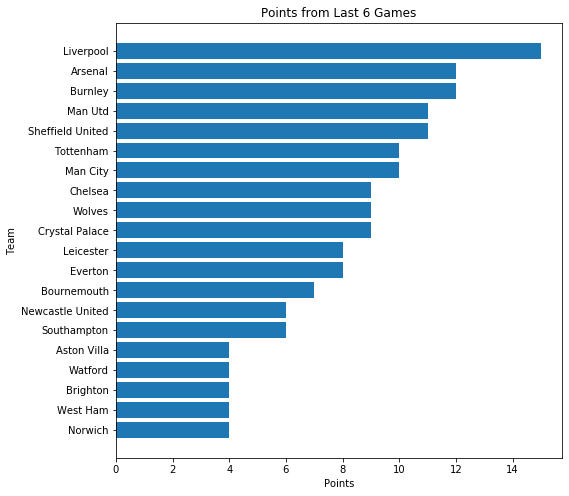

In [35]:
recent_form =[]

for team in teams:
    team_data =g_data[g_data['teamId'] == team].tail(6) # here to display only the last six games
    
    wins =team_data['wins'].sum()
    draws =team_data['draws'].sum()
    points = (3 * wins) + draws
    
    recent_form.append([team, points])

recent_form.sort(key = lambda x: x[1])

plt.figure(figsize =(8,8))
plt.barh(range(20), [x[1] for x in recent_form])
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Points from Last 6 Games')
plt.yticks(range(20), [x[0] for x in recent_form])
plt.show()

Based from the points acquired in the last 6 games prior to covid-19, Liverpool leads the table again while Arsenal is 2nd.

### CONTINUOUS PERFORMANCE: How would the expected goals influence team's positions? 

Since the league has been suspended due to covid-19, once it resumes, it is expected that, for the first few games, the teams may not perform at the same level as they were prior to covid-19. But for analysis purposes, we are assuming that teams will continue to perform at the same level as they were prior to covid-19 pandemic.  

In [36]:
team_points =[]

for team in teams:
    points_per_game = [x for x in recent_form if x[0] == team][0] [1] / 6
    
    team_data = league_table[league_table['Team'] == team].iloc[0]
    games_to_play = 38 - team_data ['P']
    new_points = int(team_data['Points'] + round(points_per_game * games_to_play))
    team_points.append([team, new_points])
    
predicted_table = pd.DataFrame(team_points, columns= ['Team', 'Points'])

predicted_table.sort_values(by=['Points'], ascending=False, inplace=True, ignore_index=True)
predicted_table.set_index(Positions, inplace=True)
predicted_table.head(30)

,Team,Points
1,Liverpool,104
2,Man City,74
3,Leicester,65
4,Chelsea,62
5,Sheffield United,61
6,Man Utd,61
7,Arsenal,60
8,Burnley,57
9,Wolves,57
10,Tottenham,56


### Conclusion


When teams are evaluated based on their performance from the last 6 games prior to covi-19, Liverpool is the uncontested champion while the last 3 bottom teams face the chances of getting relegated to the lower league.

In conclusion, these are mostly predictions. However, they are the backbone for sports analytics and give us a glimpse of which team we should expect to be crowned as Champion. Although some of the results may vary slighly, based on which main feature we are analysing, one can still notice that, for the most parts, Liverpool stands strong at the top of the list with higher chances of winning. Also, another limitation of these predictions is the fact that we should anticipate that players, hence teams, may not perform to their highest capabilities once the restrictions from covid-19 are lifted. Nonethess, this project is still worth of consideration and analysis. 

by 

#### Bernardo Vimpi

May 2020